# Mass moves mass?📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

 My question is <b>can ML help predict the greatest body weight to maximize the greatest weight to be lifted within powerlifting/ weight lifting?</b>  

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

In weightlifting, everyone knows 'mass moves mass' meaning people who weight more usually move more weight. However, for the people who want to stay in lower weight classes or just maximize their weight classes they ask themeselves: what is the greatest weight for my body to maximize my lifts without gaining crazy amount of weight or going out of my weight class?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

The more mass a person is, the greater the weight that can be lifted. However I do want to see how the weight lifted compares within a weight class. For example a weight class of 180lbs-190lbs. I could imagine that the people who weight 190lb would lift heavier, but there would be some outliers who are lighter who could lift more weight.

Some graphs I would highlight are a line graph between weight and weight lifted for the prediction vs the outcome.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

The three data sources that I will be using for this project will be the openpowerlifting.csv file (*Had to remove from my data because it exceeded github's size. I have it on my laptop downloads*), the website https://exrx.net/Testing/WeightLifting/DeadliftStandards on all main lifts (Squat, deadlift, and bench), and my own data I have recorded from my lifts as well. I will add my personal data to the powerlifting data to see how my own stats compare to other powerlifters within my weight range. Within the website, I will use the tables to determine where the powerlifters fall into regarding their weight and lifts (If they are itermidiate, advanced, elite, etc.)

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

I could not get my imports to work, however I would import pandas and beautiful soup to retreieve my data.

I would download the openpowerlifting.csv file from Kaggle using opendatasets

To open the text file I would use the with open function in read mode.

To read the tables off the website "https://exrx.net/Testing/WeightLifting/DeadliftStandards" I would use beautiful soup and scrape the tables off the url. I would do this for squat, deaadlift, and bench and combine all the tables using concat.



# Loading Data

In [1]:
import pandas as pd
import numpy as np
import opendatasets as od
import requests
from bs4 import BeautifulSoup
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score




In [2]:
dataset_url = 'https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database'
od.download(dataset_url, data_dir='./data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading powerlifting-database.zip to ./data\powerlifting-database


100%|██████████| 54.1M/54.1M [00:01<00:00, 30.0MB/s]


In [3]:
powerlifting_df = pd.read_csv('./data/powerlifting-database/openpowerlifting.csv')
powerlifting_df.head()

C:\Users\eddie\AppData\Local\Temp\ipykernel_4656\2925769496.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  powerlifting_df = pd.read_csv('./data/powerlifting-database/openpowerlifting.csv')


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [4]:
personal_df = pd.read_table('./data/personal_data.txt', sep=',')
personal_df

,Name,Sex,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg
0,Eddie Satterley,M,86.2,158.7,111.1,165.6,435.5


In [5]:

urls = [('https://exrx.net/Testing/WeightLifting/BenchStandardsKg'), ('https://exrx.net/Testing/WeightLifting/DeadliftStandardsKg'), ('https://exrx.net/Testing/WeightLifting/SquatStandardsKg')]

# create df
standard_df = pd.DataFrame()

for url in urls:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    table = soup.find('table')
    standard_df = pd.read_html(str(table))[0]
    # Merge with some df 
    
standard_df

,0,1,2,3,4,5,6
0,Kilograms,Squat - Adult Men,Squat - Adult Men,Squat - Adult Men,Squat - Adult Men,Squat - Adult Men,NaN
1,Body Weight,Untrained,Novice,Intermediate,Advanced,Elite,World Record
2,52,35.0,65.0,80.0,107.5,145.0,240
3,56,37.5,70.0,87.5,117.5,157.5,245
4,60,40.0,77.5,92.5,127.5,167.5,250
5,67,45.0,85.0,105.0,142.5,185.0,265
6,75,50.0,92.5,112.5,155.0,202.5,300
7,82,55.0,100.0,122.5,167.5,217.5,345
8,90,57.5,105.0,130.0,177.5,230.0,365
9,100,60.0,110.0,135.0,185.0,240.0,374


In [6]:
final_df = pd.concat((powerlifting_df,personal_df))
final_df

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423350,Marian Piwowarczyk,M,SBD,Raw,55.5,55-59,Masters 2,63.5,66,90.0,...,372.60,295.66,423.03,Yes,Poland,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423351,Andrzej Bryniarski,M,SBD,Raw,62.5,60-64,Masters 2,94.4,105,140.0,...,382.36,264.22,378.84,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423352,Stanisław Goroczko,M,SBD,Raw,63.5,60-64,Masters 2,80.8,83,-165.0,...,NaN,NaN,NaN,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423353,Jan Sowa,M,SBD,Raw,70.5,70-74,Masters 2,82.0,83,-115.0,...,NaN,NaN,NaN,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup


# EDA

## Basic Understanding 

In [7]:
display(final_df.shape)
display(final_df.info())
display(final_df.describe())

(1423355, 37)

<class 'pandas.core.frame.DataFrame'>
Index: 1423355 entries, 0 to 0
Data columns (total 37 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Name             1423355 non-null  object 
 1   Sex              1423355 non-null  object 
 2   Event            1423354 non-null  object 
 3   Equipment        1423354 non-null  object 
 4   Age              757527 non-null   float64
 5   AgeClass         786800 non-null   object 
 6   Division         1415176 non-null  object 
 7   BodyweightKg     1406623 non-null  float64
 8   WeightClassKg    1410042 non-null  object 
 9   Squat1Kg         337580 non-null   float64
 10  Squat2Kg         333349 non-null   float64
 11  Squat3Kg         323842 non-null   float64
 12  Squat4Kg         3696 non-null     float64
 13  Best3SquatKg     1031451 non-null  float64
 14  Bench1Kg         499779 non-null   float64
 15  Bench2Kg         493486 non-null   float64
 16  Bench3Kg         478485 non-n

None

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner,IPFPoints
count,757527.000000,1.406623e+06,337580.000000,333349.000000,323842.000000,3696.000000,1.031451e+06,499779.000000,493486.000000,478485.000000,...,363544.000000,356023.000000,339947.000000,9246.000000,1.081809e+06,1.313185e+06,1.304407e+06,1.304254e+06,1.304407e+06,1.273286e+06
mean,31.501570,8.422504e+01,114.102442,92.155846,30.056842,71.356870,1.740049e+02,83.892373,55.065745,-18.520481,...,162.700840,130.228378,12.995484,78.914945,1.872585e+02,3.956148e+02,2.882247e+02,2.960682e+02,2.718484e+02,4.854330e+02
std,13.371707,2.322010e+01,147.143021,173.701524,200.413385,194.522045,6.923928e+01,105.196350,130.302229,144.225726,...,108.681438,162.680134,215.052488,192.605159,6.232818e+01,2.011420e+02,1.231805e+02,1.249700e+02,1.175571e+02,1.133489e+02
min,0.000000,1.510000e+01,-555.000000,-580.000000,-600.500000,-550.000000,-4.775000e+02,-480.000000,-507.500000,-575.000000,...,-461.000000,-470.000000,-587.500000,-461.000000,-4.100000e+02,2.500000e+00,1.470000e+00,1.470000e+00,1.410000e+00,2.160000e+00
25%,21.000000,6.670000e+01,90.000000,68.000000,-167.500000,-107.840000,1.224700e+02,57.500000,-52.500000,-140.000000,...,125.000000,115.000000,-210.000000,-110.000000,1.383500e+02,2.325000e+02,1.979000e+02,2.048200e+02,1.828100e+02,4.028600e+02
50%,28.000000,8.180000e+01,147.500000,145.000000,110.000000,135.000000,1.678300e+02,105.000000,95.000000,-60.000000,...,180.000000,177.500000,117.500000,145.150000,1.850000e+02,3.787500e+02,3.052000e+02,3.120300e+02,2.859400e+02,4.780500e+02
75%,40.000000,9.915000e+01,200.000000,205.000000,192.500000,205.000000,2.175000e+02,145.000000,145.000000,117.500000,...,226.800000,230.000000,205.000000,210.000000,2.300000e+02,5.400000e+02,3.745600e+02,3.837600e+02,3.552800e+02,5.597000e+02
max,97.000000,2.580000e+02,555.000000,566.990000,560.000000,505.500000,5.750000e+02,467.500000,487.500000,478.540000,...,450.000000,460.400000,457.500000,418.000000,5.850000e+02,1.367500e+03,7.793800e+02,8.044000e+02,7.429600e+02,1.245930e+03


## Correlation

First wanted to have a correlation matrix of all the varaibles before I reduced the columns just to see:

<Axes: >

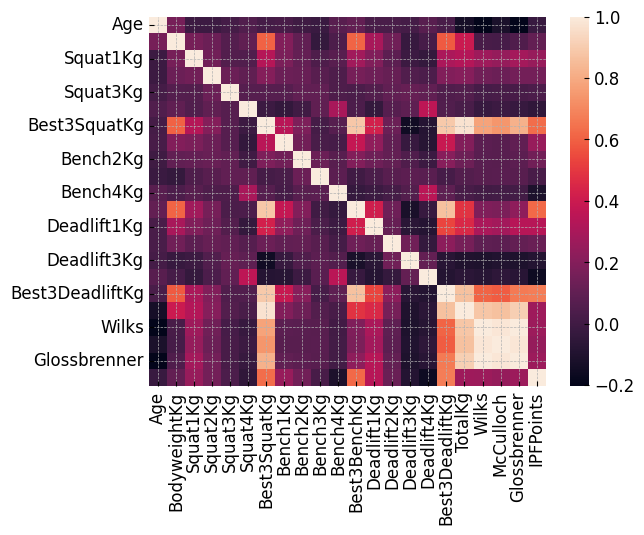

In [ ]:
final_df_corr = final_df.corr()
final_df_corr
sns.heatmap(final_df_corr)

## Histograms

I wanted to see the skew of data. For data that is not the best, they have negative points. That means the lifter failed that weight attempt. I will use the 'best' categories to tell the sure weight that the lifter lifted successfully. 

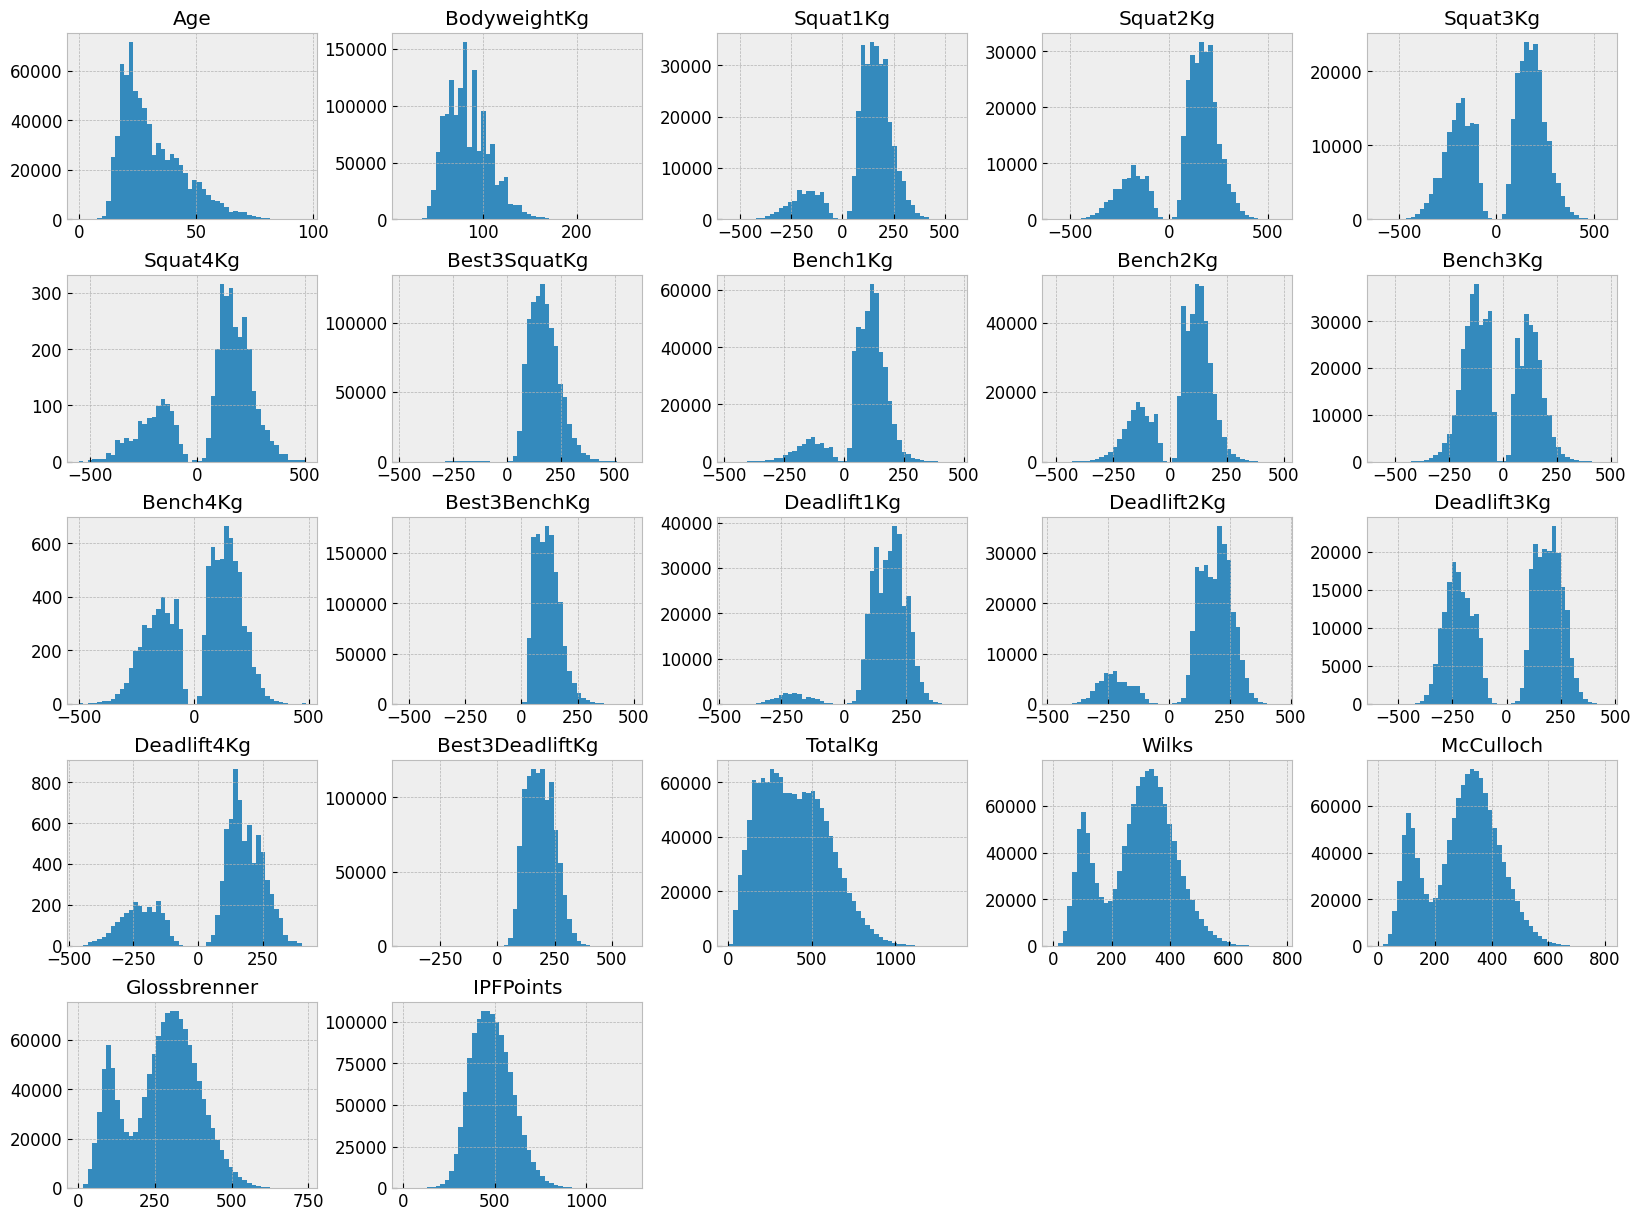

In [9]:
final_df.hist(bins=50, figsize=(20,15))
plt.show()

## Cleaning Columns

I know for my project I will only need actual numerical values such as BodyWeight, each of their best lifts, and the total of their lifts. Wilks is a value that determines the 'best lifter' baised on calculations to compare everyone even in different weight groups and sex's. 

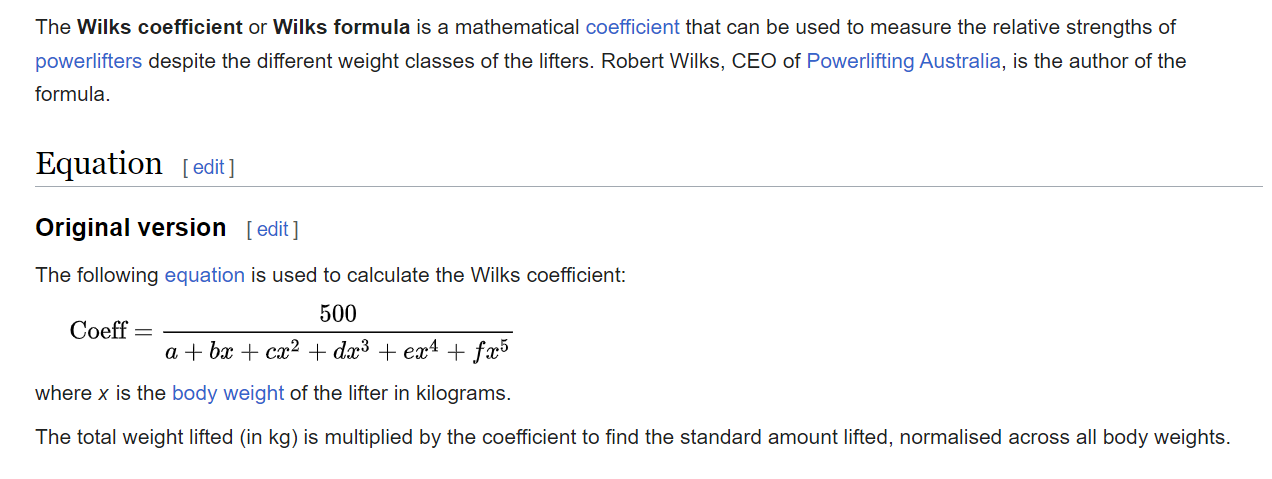

In [10]:
final_df = final_df[final_df['Event'] == 'SBD']
final_df = final_df[['BodyweightKg','Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg', 'Wilks']]
final_df

,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks
0,59.8,105.0,55.0,130.0,290.0,324.16
1,58.5,120.0,67.5,145.0,332.5,378.07
3,60.0,105.0,72.5,132.5,310.0,345.61
4,104.0,140.0,80.0,170.0,390.0,321.25
5,74.0,142.5,82.5,145.0,370.0,354.74
...,...,...,...,...,...,...
1423349,73.5,175.0,87.5,190.0,452.5,327.07
1423350,63.5,110.0,95.0,170.0,375.0,304.16
1423351,94.4,160.0,100.0,180.0,440.0,274.48
1423352,80.8,NaN,NaN,NaN,NaN,NaN


## Duplicates

In [11]:
final_df.duplicated().sum()

91328

In [12]:
final_df[final_df.duplicated]

,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks
405,80.8,145.5,82.5,135.0,362.5,329.88
406,136.5,410.0,210.0,260.0,880.0,493.66
407,81.2,220.0,112.5,210.0,542.5,366.95
408,98.7,192.5,120.0,187.5,500.0,305.92
409,165.0,335.0,272.5,292.5,900.0,491.11
...,...,...,...,...,...,...
1423341,122.6,260.0,170.0,270.0,700.0,400.52
1423342,72.8,170.0,115.0,250.0,535.0,389.37
1423346,93.1,240.0,155.0,270.0,665.0,417.53
1423348,72.7,200.0,70.0,235.0,505.0,367.91


I figured to drop the duplicates thinking they just competed multiple times so they had multiple entries. Even if that is the case, the duplicates are not needed for the findings. So they can all be dropped. 

In [13]:
final_df.drop_duplicates( inplace= True)

In [14]:
display(final_df.duplicated().sum())
display(final_df.shape)

0

(981909, 6)

## Missing Values

In [15]:
final_df.isna().sum()

BodyweightKg        4673
Best3SquatKg       10513
Best3BenchKg       26643
Best3DeadliftKg    33574
TotalKg            46738
Wilks              51214
dtype: int64

Since I am dealing with weightlifting data, I can not just insert a median or average into missing values (for example median bench press is 275lbs and a 140lb lifter has no values. That 140lb lifter now has 275lb bench which is very un-likely). Because of this, I will drop all of the missing values. 

In [16]:
final_df.dropna(inplace=True)
display(final_df.isna().sum())
display(final_df.shape)

BodyweightKg       0
Best3SquatKg       0
Best3BenchKg       0
Best3DeadliftKg    0
TotalKg            0
Wilks              0
dtype: int64

(929802, 6)

In [17]:
final_df.head()

,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks
0,59.8,105.0,55.0,130.0,290.0,324.16
1,58.5,120.0,67.5,145.0,332.5,378.07
3,60.0,105.0,72.5,132.5,310.0,345.61
4,104.0,140.0,80.0,170.0,390.0,321.25
5,74.0,142.5,82.5,145.0,370.0,354.74


## Outliers

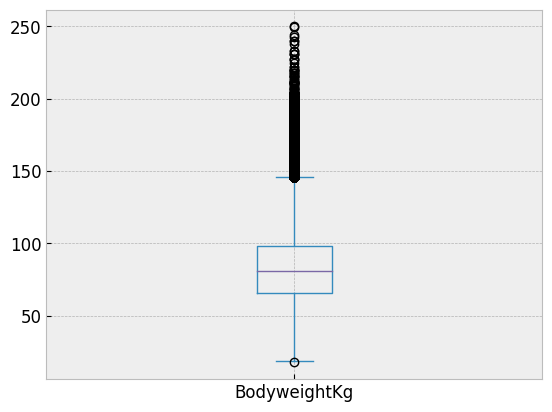

In [18]:
final_df['BodyweightKg'].plot(kind='box')
plt.show()

In [19]:
q1 = final_df['BodyweightKg'].quantile(.25)
q3 = final_df['BodyweightKg'].quantile(.75)
range = q3-q1

print('Q1: {}, Q3: {}, Range: {} '.format(q1,q3,range))

lower_bound = q1 - 1.5 * range
upper_bound = q3 + 1.5 * range

print('Lower bound: {}, Upper bound: {}'.format(lower_bound,upper_bound))

Q1: 65.77, Q3: 97.8, Range: 32.03 
Lower bound: 17.724999999999994, Upper bound: 145.845


In [20]:
final_df[(final_df['BodyweightKg'] < lower_bound) | (final_df['BodyweightKg'] > upper_bound)]

,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks
29,146.4,137.5,72.5,142.5,352.5,272.07
85,162.0,290.0,195.0,280.0,765.0,418.61
129,149.2,170.0,80.5,160.0,410.0,315.67
163,148.6,170.0,77.5,165.0,412.5,317.74
228,148.3,320.0,180.0,285.0,785.0,435.03
...,...,...,...,...,...,...
1422306,152.0,190.0,150.0,230.0,570.0,314.79
1422867,155.2,270.0,190.0,325.0,785.0,432.25
1423084,195.3,290.0,180.0,240.0,710.0,377.96
1423085,157.7,280.0,190.0,320.0,790.0,434.00


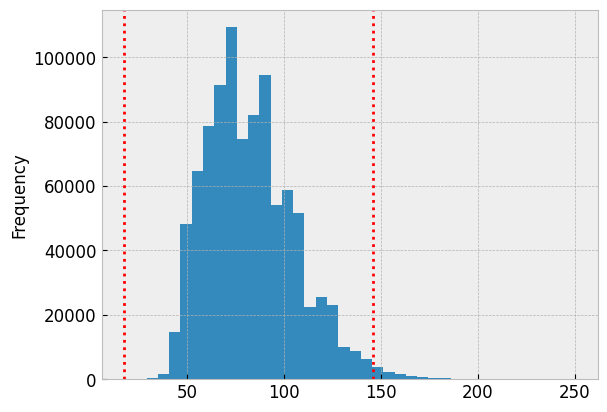

In [21]:
final_df['BodyweightKg'].plot.hist(bins=40)
bounds = [lower_bound, upper_bound]
for bound in bounds:
    plt.axvline(bound, color='r', linestyle=':')
plt.show()

After looking at the outliers, I believe I will keep these values. As people can truly be 150kg, especially powerlifters. So I will keep this larger values in. 

# ML

I have had a couple of ML classes under my belt. Professor used some ML processes that are a little different from what I am used to. I am using the intel I have learned previous for my project. I am going to use linear regression to predict the Wilks model (how preficient a lifter is) from the lifters body weight and totals. 

## Splitting dataset

In [22]:
X = final_df.drop(columns=['Wilks'], axis = 1)
Y = final_df['Wilks']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

## Train model

In [24]:
linear_model = LinearRegression().fit(x_train, y_train)

In [25]:
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.8240070426245191


In [26]:
predictors = x_train.columns
print(predictors)

Index(['BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg',
       'TotalKg'],
      dtype='object')


In [27]:
print(linear_model.intercept_)

254.05835272001775


In [28]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

TotalKg           -37.495092
BodyweightKg       -2.026225
Best3BenchKg       37.756134
Best3DeadliftKg    37.882735
Best3SquatKg       38.400032
dtype: float64


In [29]:
y_pred = linear_model.predict(x_test)

## Results

In [30]:
results_df = pd.DataFrame({'predicted': y_pred, 'actual': y_test, 'difference': (y_pred - y_test)})

results_df.head(10)

,predicted,actual,difference
279165,295.503180,256.56,38.943180
976065,387.189271,378.36,8.829271
150081,446.934576,437.30,9.634576
112192,223.301742,194.71,28.591742
590307,316.019841,299.73,16.289841
191409,311.016904,344.46,-33.443096
1021180,410.226682,407.68,2.546682
935066,277.743220,305.40,-27.656780
1284543,288.035408,300.20,-12.164592
180132,433.369081,448.73,-15.360919


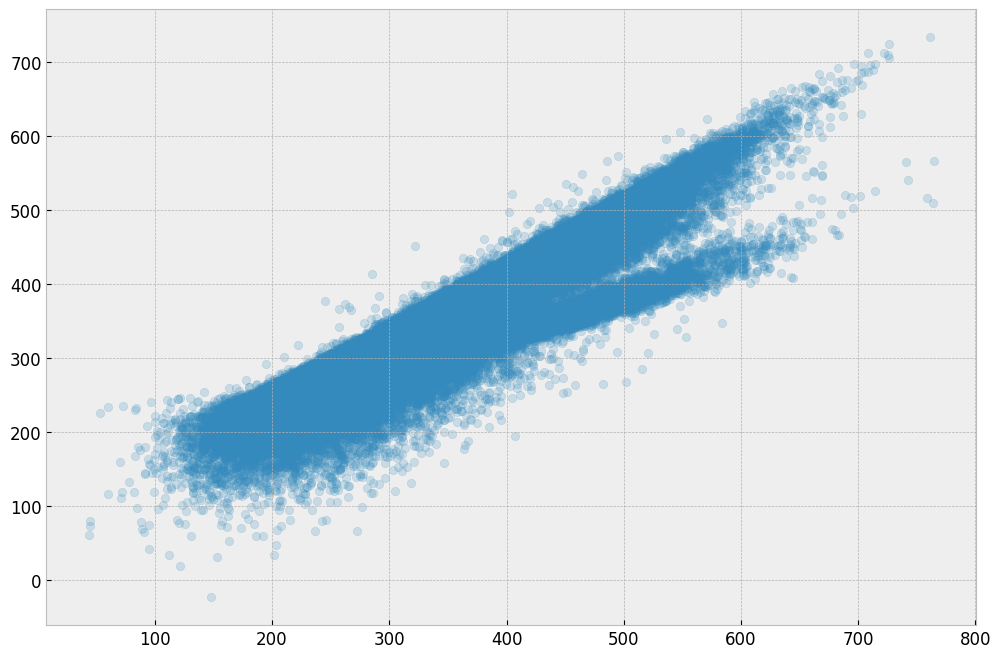

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=.2)
plt.show()

In [ ]:
print("Testing R2 score: ", r2_score(y_test, y_pred),"RMSE score: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Testing R2 score:  0.8257073552507701 RMSE score:  34.46188942169321


## Simple Linear Regression

In [44]:
X = final_df[['BodyweightKg','TotalKg']]
y = final_df['Wilks']

wilks_model = LinearRegression()
wilks_model.fit(X, y)

y_pred = wilks_model.predict(X)

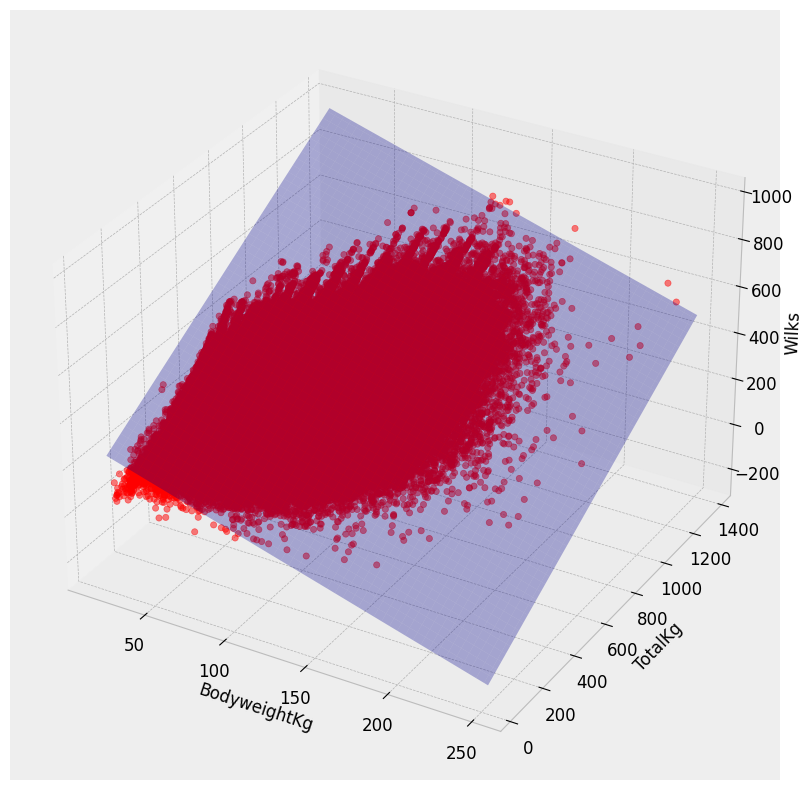

In [45]:
x_surf, y_surf = np.meshgrid(
  np.linspace(final_df.BodyweightKg.min(), final_df.BodyweightKg.max(), 100),
  np.linspace(final_df.TotalKg.min(), final_df.TotalKg.max(), 100)
)
surfaceX = pd.DataFrame({'BodyweightKg': x_surf.ravel(), 'TotalKg': y_surf.ravel()})
predictedWilksForSurface=wilks_model.predict(surfaceX)

predictedWilksForSurface=np.array(predictedWilksForSurface)


fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(final_df['BodyweightKg'],final_df['TotalKg'],final_df['Wilks'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, predictedWilksForSurface.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('BodyweightKg')
ax.set_ylabel('TotalKg')
ax.set_zlabel('Wilks')
plt.show()

# Fun Facts about the data

The largest wilks value, which means is the strongest lifter in the whole data set, is not the heaviest lifter. I always thought the more mass someone would be, means the stronger the person. This wilks value shows that body weight does not equal strength.

In [43]:
final_df.loc[final_df['BodyweightKg'].idxmax()]

BodyweightKg        250.05
Best3SquatKg        545.00
Best3BenchKg        355.00
Best3DeadliftKg     315.00
TotalKg            1215.00
Wilks               645.78
Name: 1246637, dtype: float64

In [42]:
final_df.loc[final_df['Wilks'].idxmax()]

BodyweightKg        122.97
Best3SquatKg        548.85
Best3BenchKg        442.25
Best3DeadliftKg     371.95
TotalKg            1363.05
Wilks               779.38
Name: 1340865, dtype: float64

# Fun facts with my personal Data

I wanted to use my linear regression model to predict the Wilks value given the body weight and totalKg lifted to predict my Wilks value. I entered my body weight and my total, and I recieved a 319. Which I am not really the happiest with, however I will take it. 

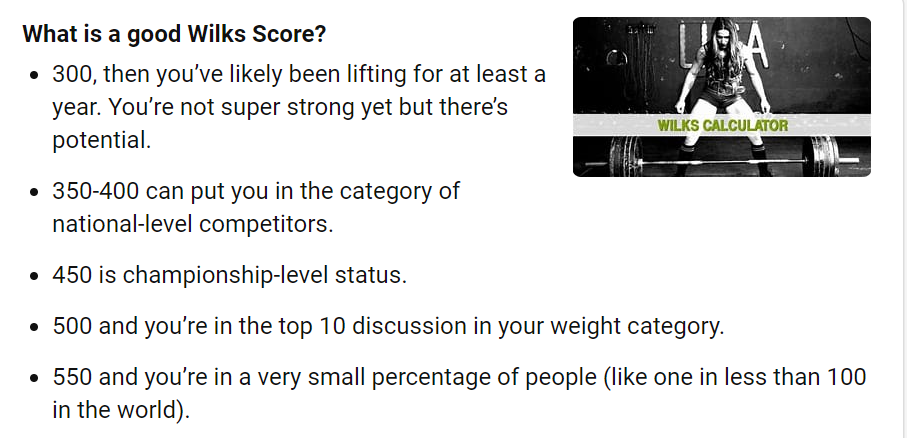

In [46]:
wilks_model.predict([[86.2,435.5]])

c:\Users\eddie\.virtualenvs\final-project-3DSatterley-XLOvHCBO\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([319.0266329])

# Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->
ChatGPT and your notes/ in class sandbox as well as previous labs and assignments

Your in-class sandbox notebooks as well as class notes, ChatGBT, stackoverflow

In [47]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 11120 bytes to source.py
